<a href="https://colab.research.google.com/github/Zhangmingyang-Su/Chris-Su/blob/master/Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gradient Boosting

In [0]:
# install package
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Data Generation

In [0]:
x = np.arange(0,50)
# just random uniform distributions in differnt range
y1 = np.random.uniform(10,15,10)
y2 = np.random.uniform(20,25,10)
y3 = np.random.uniform(0,5,10)
y4 = np.random.uniform(30,35,10)
y5 = np.random.uniform(15,20,10)
y = np.concatenate((y1,y2,y3,y4,y5))

Text(0.5, 1.0, 'Predict Y From X')

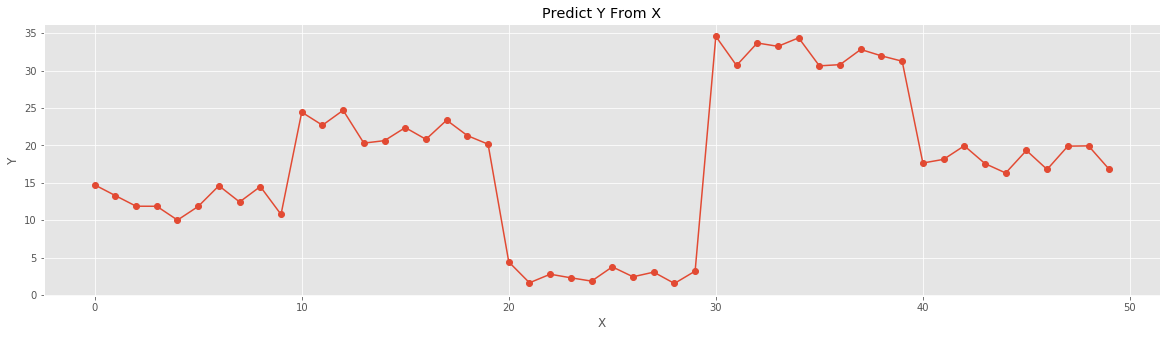

In [9]:
plt.figure(figsize=(20,5))
plt.plot(x, y, 'o-')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Predict Y From X')

## Using gradient boosting method to fit residual model

In [0]:
from sklearn.tree import DecisionTreeRegressor

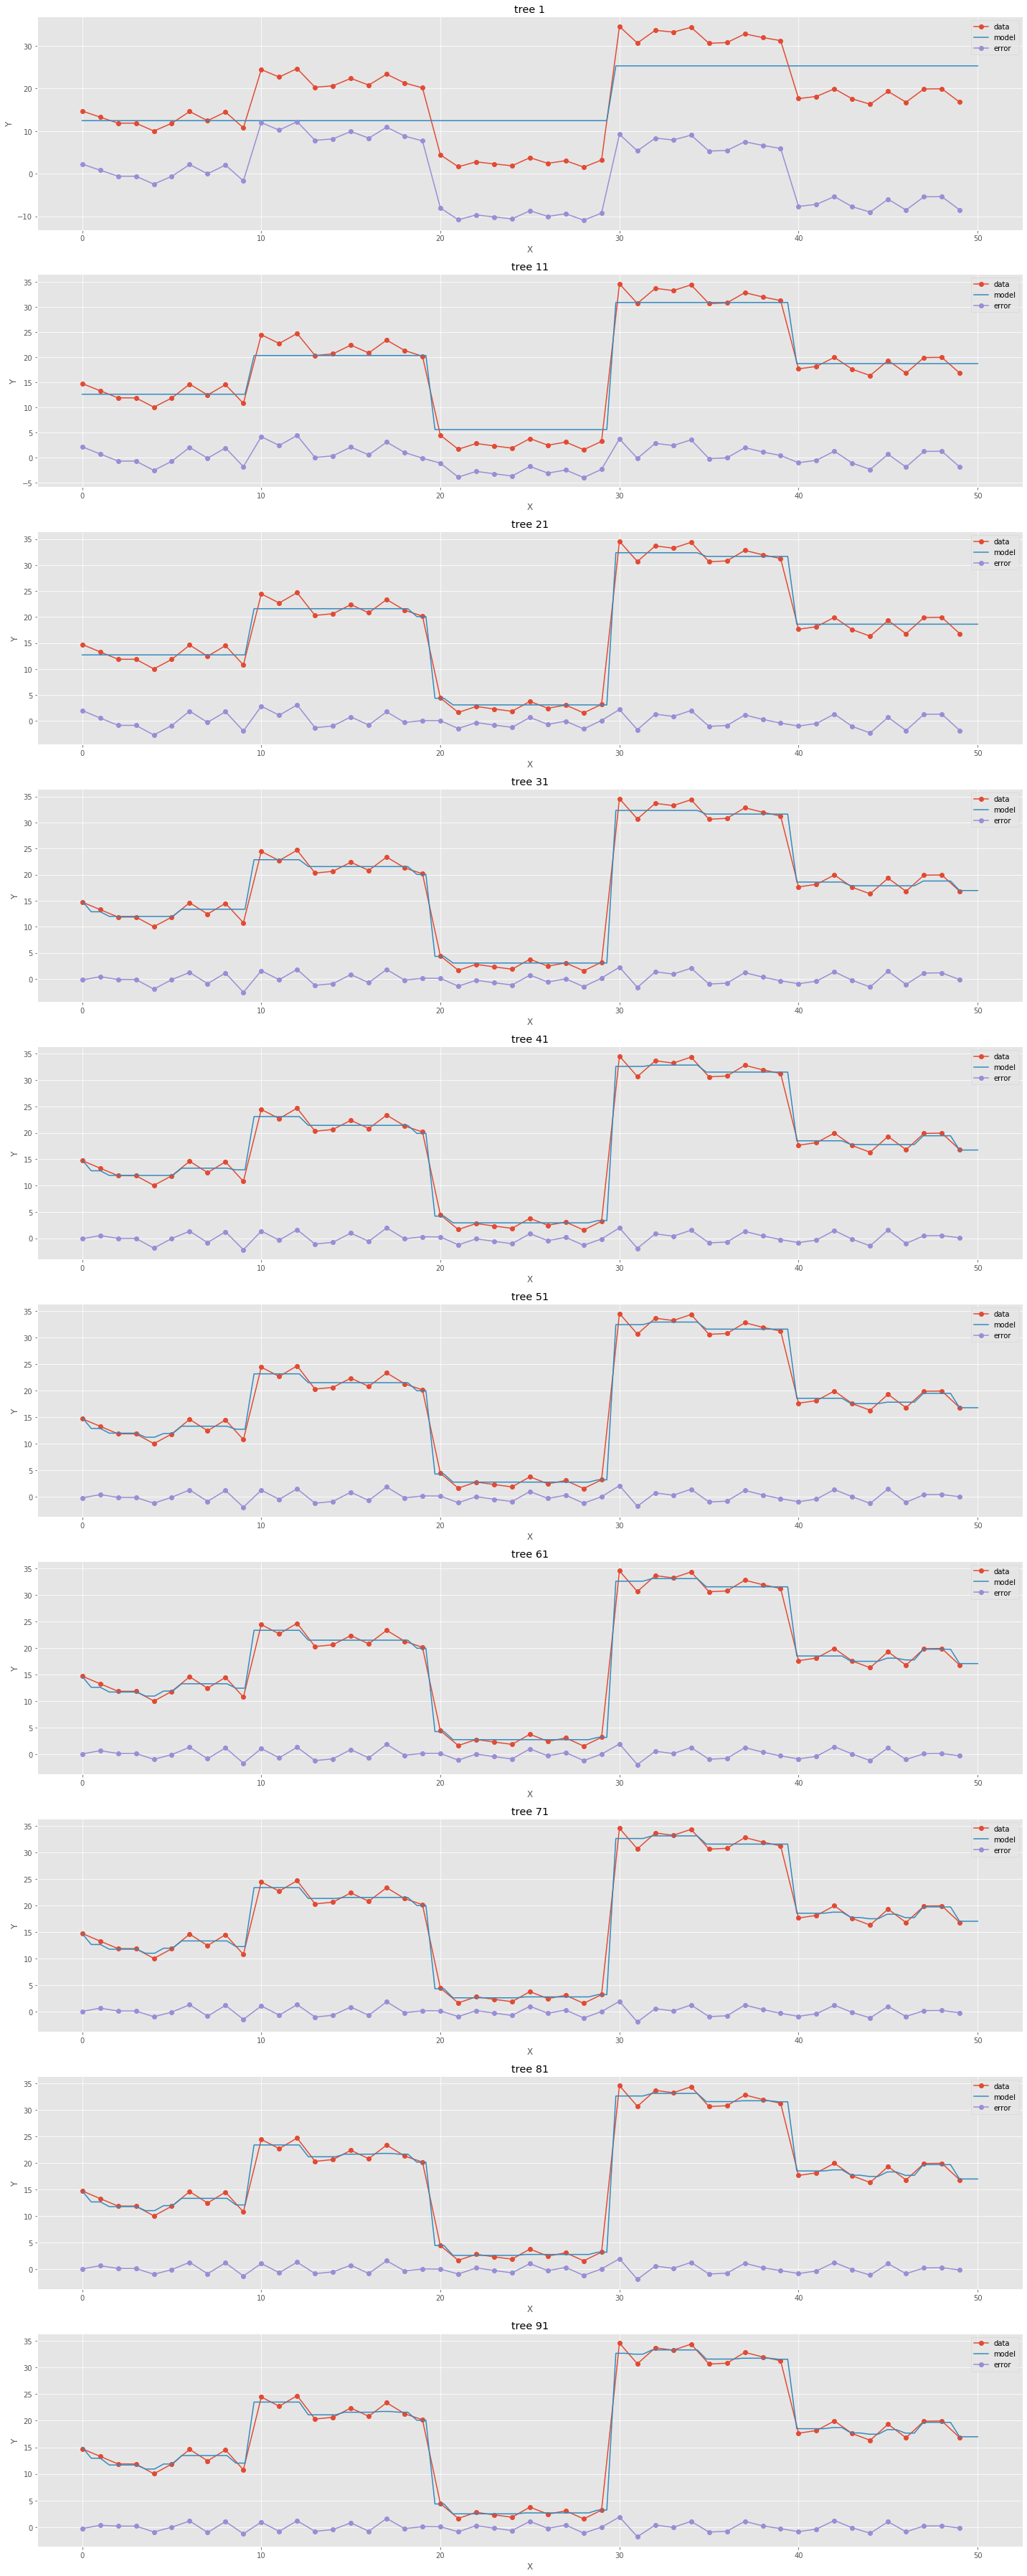

In [14]:
X = x.reshape(-1, 1)
plt.rcParams['figure.figsize'] = 20, 50
trees = []
err = y
plot_num = 1
for i in range(100):
    est = DecisionTreeRegressor(max_leaf_nodes=2)
    est.fit(X, err)
    trees.append(est)
    y_pred = np.sum([e.predict(X) for idx, e in enumerate(trees)], axis=0)
    err = y - y_pred
    #err = np.array([1 if v > 0 else (-1 if v < 0 else 0) for v in (y - y_pred)])
    if i % 10 == 0:
        plt.subplot(10, 1, plot_num)
        plot_num += 1
        tx = np.linspace(0, 50, 100)
        ty = np.sum([e.predict(tx.reshape(-1, 1)) for e in trees], axis=0)
        plt.plot(x, y, 'o-', label = 'data')
        plt.plot(tx, ty, label='model')
        plt.plot(X, err, 'o-', label='error')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('tree %d' % (i+1))
        _ = plt.legend()
plt.tight_layout()